<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/temp/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

In [2]:
item_categories = pd.read_csv("item_categories.csv")
items = pd.read_csv("items.csv")
shops = pd.read_csv("shops.csv")
test = pd.read_csv("test.csv")
sales_train = pd.read_csv("sales_train.csv")

In [3]:
# item_categories.head()
# items.nunique()
# shops.nunique()
display(test.nunique())
display(sales_train.nunique())
# display(sales_train.info())

ID         214200
shop_id        42
item_id      5100
dtype: int64

date               1034
date_block_num       34
shop_id              60
item_id           21807
item_price        19993
item_cnt_day        198
dtype: int64

In [4]:
# Convert 'date' into datetime format
sales_train['f_date'] = pd.to_datetime(sales_train['date'],format='%d.%m.%Y')

sales_train.drop(['date','item_price'],axis=1,inplace=True)

In [5]:
# Drop rows where 'item_cnt_day' = -1
# filt = sales_train['item_cnt_day'] != -1
# sales_train_updated = sales_train.loc[filt]

In [6]:
sales_train.shape

(2935849, 5)

In [ ]:
sales_train.set_index('f_date',inplace=True)

In [11]:
sales_train_copy = sales_train.copy()

In [12]:
sales_train_copy.head()

,date_block_num,shop_id,item_id,item_cnt_day
f_date,,,,
2013-01-02,0,59,22154,1.0
2013-01-03,0,25,2552,1.0
2013-01-05,0,25,2552,-1.0
2013-01-06,0,25,2554,1.0
2013-01-15,0,25,2555,1.0


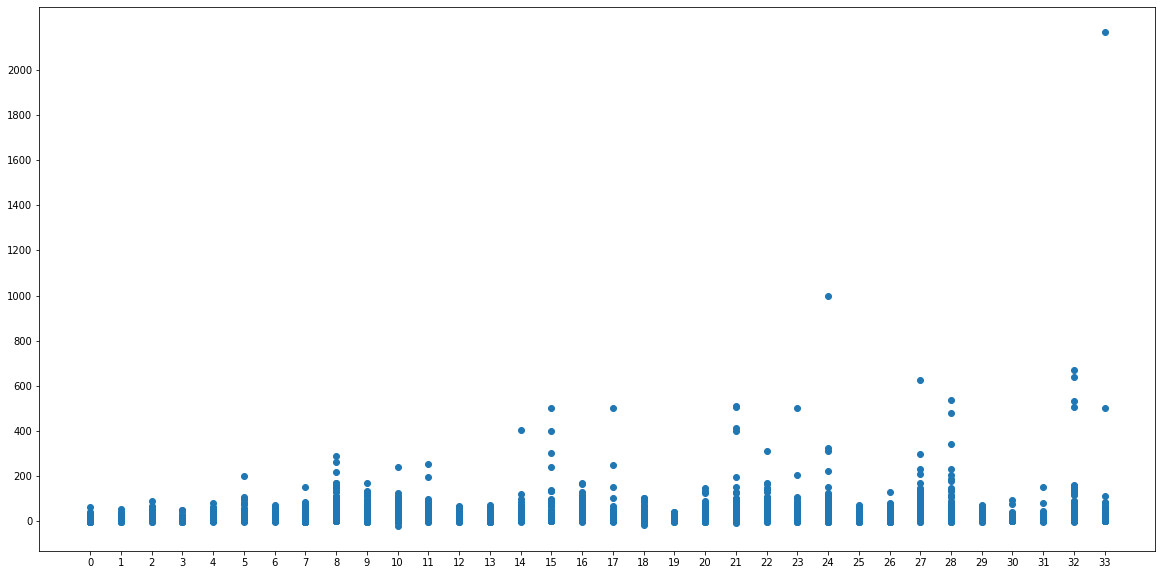

In [8]:
fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(sales_train['date_block_num'],sales_train['item_cnt_day'])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 34, 1))
ax.yaxis.set_ticks(np.arange(0, 2200, 200))

In [9]:
t3 = sales_train.groupby(by=['date_block_num','shop_id','item_id'],as_index=False).agg({'item_cnt_day':'sum'})
t3

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1609119,33,59,22087,6.0
1609120,33,59,22088,2.0
1609121,33,59,22091,1.0
1609122,33,59,22100,1.0


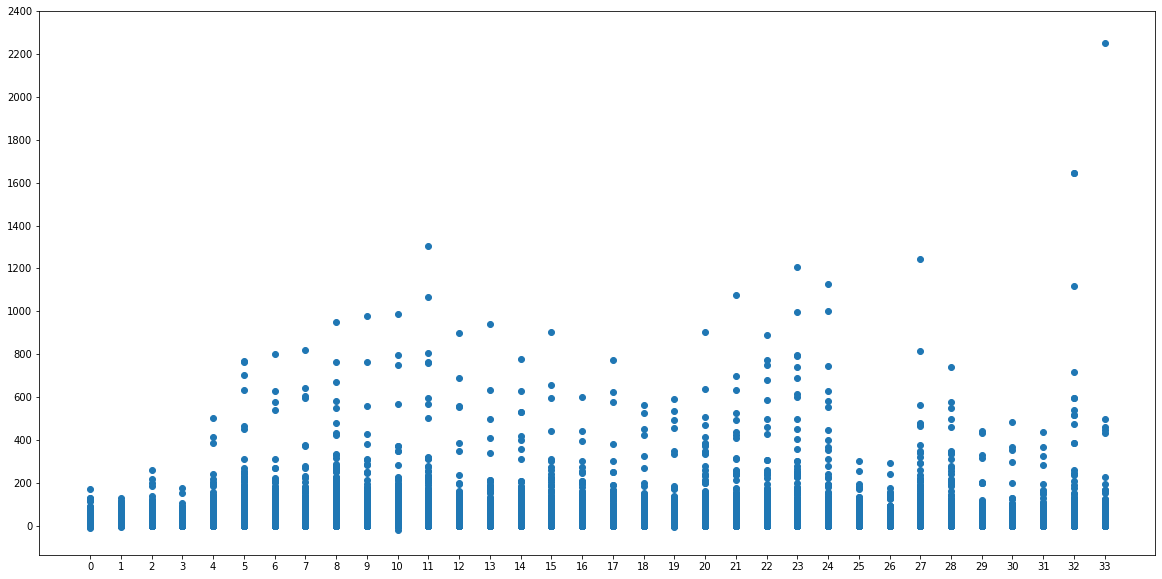

In [11]:
fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(t3['date_block_num'],t3['item_cnt_day'])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 34, 1))
ax.yaxis.set_ticks(np.arange(0, 2600, 200))